# Assignment 4

Welcome to the assignment for week 4.

To pass the assignment, you need to solve task 4.1 CAMSHIFT or 4.2 HOG. Solving both will unlock your BONUS point.

## Task 4: CAMSHIFT & HOG

### Task 4.1: CAMSHIFT

* Implement a function that creates a color histogram. Pass either an image and ROI, or the image underlying the ROI. 
* For this purpose, a second (or third) parameter can be passed to specify the number of bins. 
* Load the image "images/racecar.png" and convert the image to the HSV color space. Plot the Hue channel. (**RESULT**)

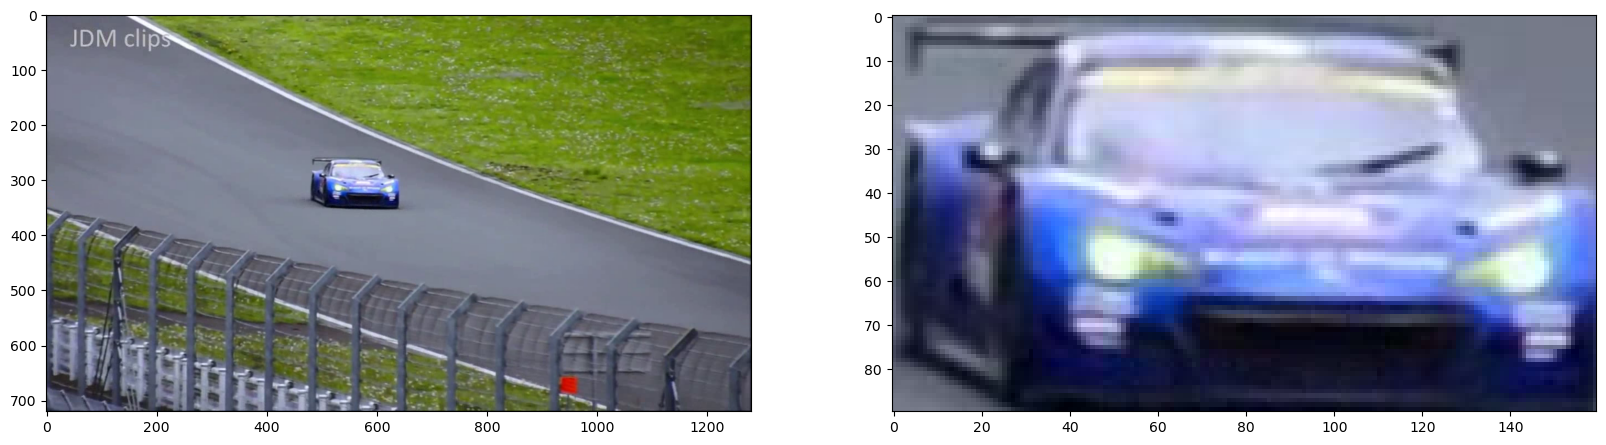

In [44]:
%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')


IMAGES_PER_ROW = 4

MIN_SATURATION_CAR = 0.2
MIN_VALUE_CAR = 0.5
MIN_SATURATION_TACO = 0.8
MIN_VALUE_TACO = 0.2
MIN_PROB_CAR = 0.21

ROI_FRAME_MARGIN_CAR = 60
ROI_FRAME_MARGIN_TACO = 20



plt.close()
plt.close()
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# ...

# ...
image = io.imread('images/racecar.png')
imageCar = image[260:350, 480:640]
def createColorHistogram(img, binCount, out = plt):
    img = img.astype(float) / 255.0
    hsv_img = color.rgb2hsv(img)
    hue_channel = hsv_img[:,:,0]
    hue_hist, hue_bins = np.histogram(hue_channel,bins = binCount, range = (0,1))
    return hue_bins[:-1], hue_hist

ax1.imshow(image)
ax2.imshow(imageCar)

plt.show()

[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.3476

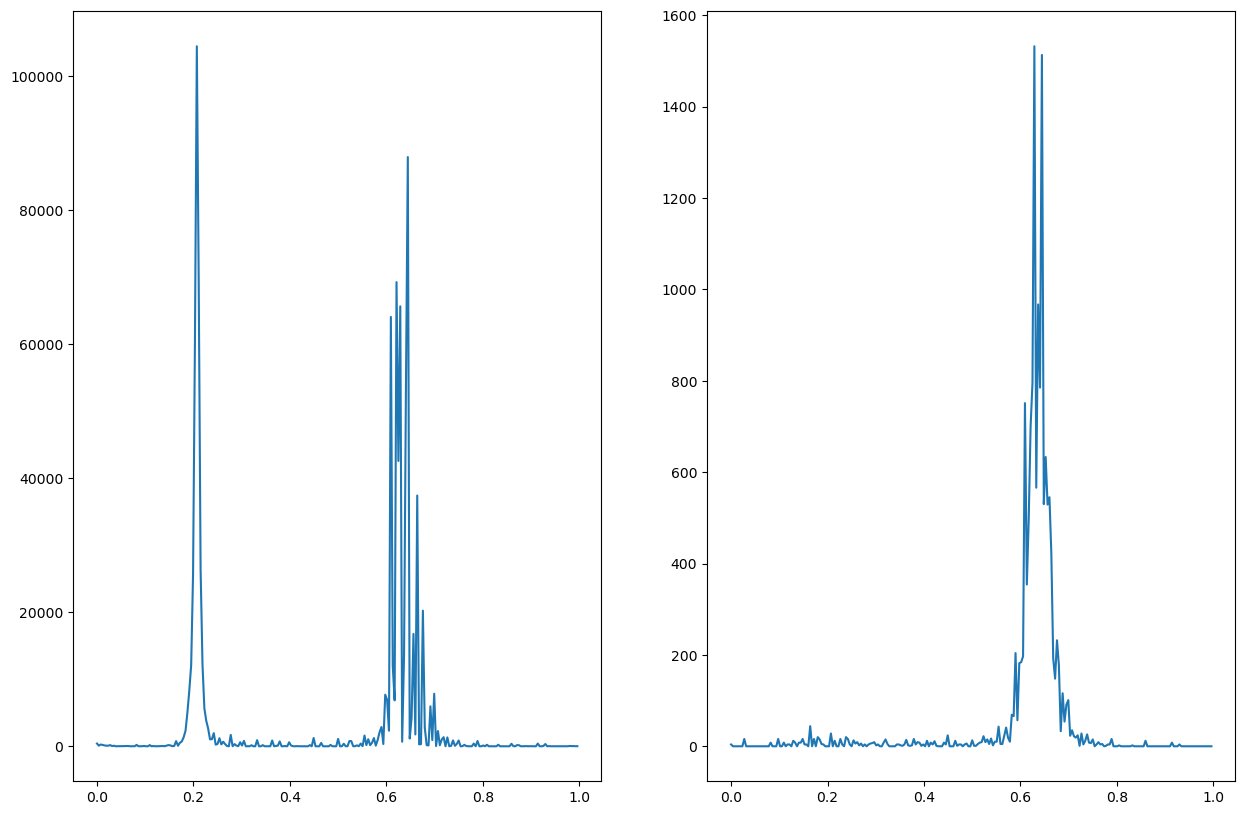

In [45]:
plt.close()
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

image_hue_hist,image_hue_bins = createColorHistogram(image,256)
histgramCar256_hue_hist,histgramCar256_hue_bins = createColorHistogram(imageCar,256)



print(histgramCar256_hue_hist)
ax1.plot(image_hue_hist,image_hue_bins)
ax2.plot(histgramCar256_hue_hist,histgramCar256_hue_bins)
plt.show()


* Display the histogram for the Hue channel for the entire image and for the RIO (x,y) = (480, 260) to (640, 350). Vary the number of bins for testing purposes (**RESULT**).

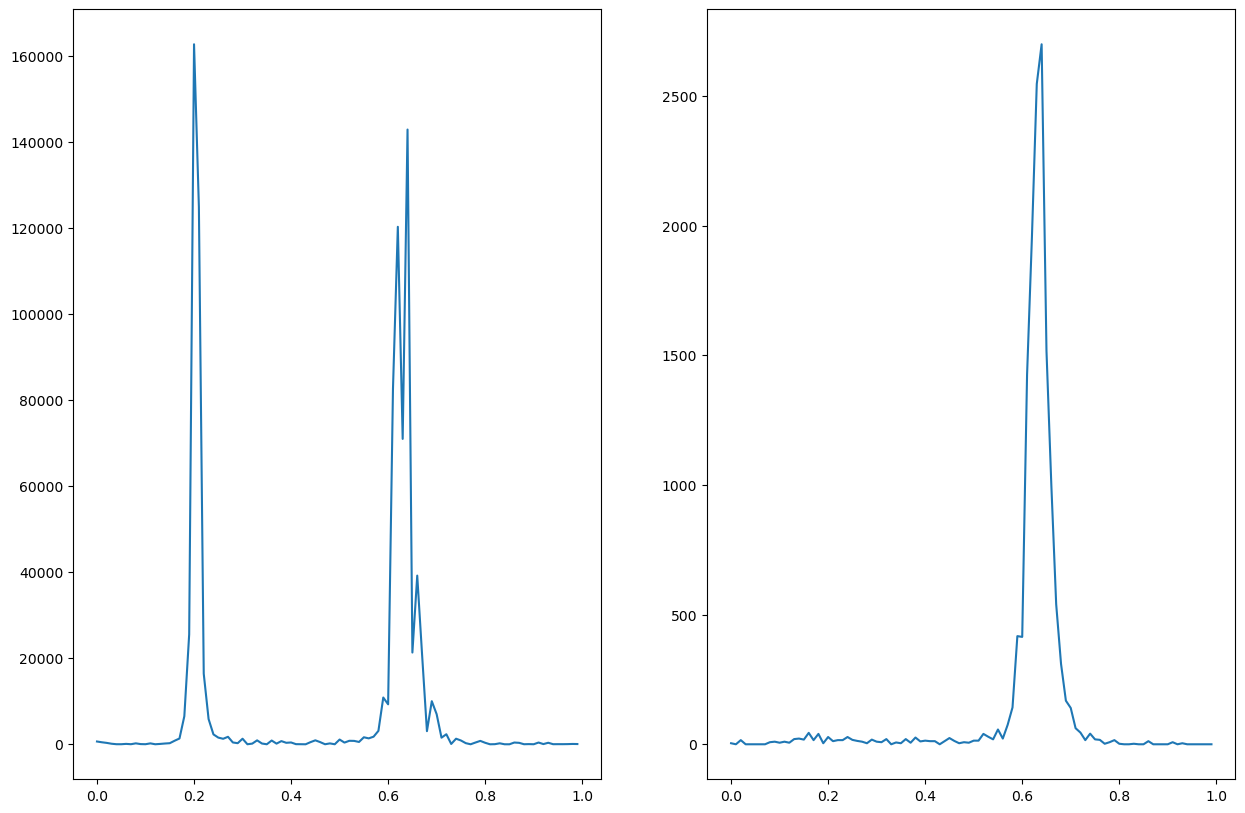

In [46]:
plt.close()
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)


image_hue_bins,image_hue_hist = createColorHistogram(image,100)
histgramCar100_hue_bins,histgramCar100_hue_hist = createColorHistogram(imageCar,100)

ax1.plot(image_hue_bins,image_hue_hist)
ax2.plot(histgramCar100_hue_bins,histgramCar100_hue_hist)
plt.show()


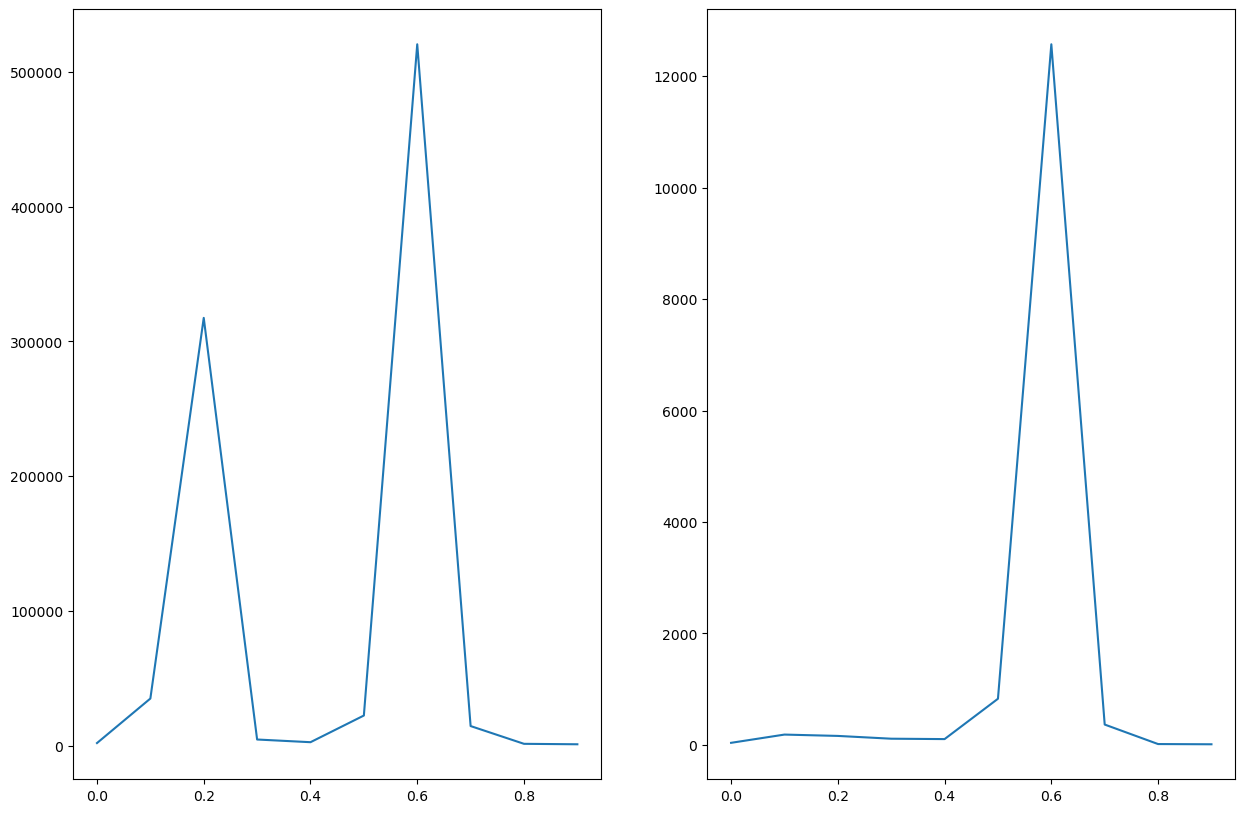

In [47]:
plt.close()
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

image_hue_bins,image_hue_hist = createColorHistogram(image,10)
histgramCar10_hue_bins,histgramCar10_hue_hist = createColorHistogram(imageCar,10)

ax1.plot(image_hue_bins,image_hue_hist)
ax2.plot(histgramCar10_hue_bins,histgramCar10_hue_hist)
plt.show()


* Implement the method outlined in the CAMSHIFT paper to create a probability distribution for a given object's hue histogram
* Create the histogram of the car from the image "racecar.png" and apply the new function to the last frame of the video (images/racecar/151.jpg) (**RESULT**)

In [64]:
# Tip: in der Nacht sind alle Katzen grau ;)
#, objectHist, nbins, minSaturation, minValue

def createProbDistribution(image,objectHist,objectBins,MIN_SATURATION_CAR,MIN_VALUE_CAR,MIN_PROB_CAR):


    image = image.astype(float) / 255.0
    hsv_image = color.rgb2hsv(image)
    gray_image = color.rgb2gray(image)

    #objectHist = min_max_scaling(objectHist)
    hue_channel = hsv_image[:,:,0]
    saturation = hsv_image[:,:,1]
    value = hsv_image[:,:,2]
    object_his = objectHist
    obj_bins = objectBins
    object_total_pixel = obj_bins.sum()

    object_hue_prob = obj_bins/object_total_pixel
    img_prob = np.zeros_like(gray_image)

    for i, row in enumerate(hsv_image):
        for j, pixel in enumerate(row):
             for k in range(len(object_his) - 1):  # Avoid out-of-range errors
                if (saturation[i][j] < MIN_SATURATION_CAR or value[i][j] < MIN_VALUE_CAR or hue_channel[i][j] < MIN_PROB_CAR):
                    img_prob[i][j] = 0.0
                elif (object_his[k] <= hue_channel[i][j] < object_his[k + 1]):
                    prob = object_hue_prob[k]
                    img_prob[i][j] = prob
    return img_prob

image = io.imread('images/racecar.png')
lastFrame = io.imread('images/racecar/151.jpeg')
img_prob = createProbDistribution(image,histgramCar256_hue_hist,histgramCar256_hue_bins,MIN_VALUE_CAR,MIN_PROB_CAR,MIN_PROB_CAR)
#takes 4 min and 10 s to compute ;_;

(720, 1280)
0.0


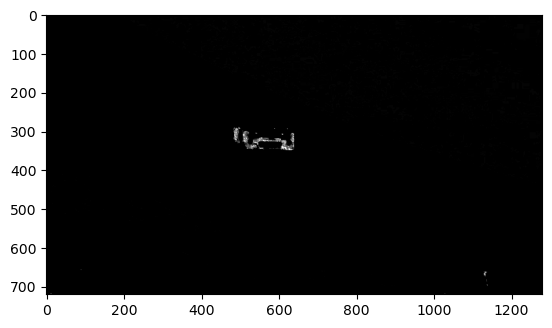

In [65]:
print(img_prob.shape)
print(img_prob[450][1200])
plt.close()
plt.imshow(img_prob,cmap = "gray")
plt.show()
#0.05451388888888889

 * Show ROI in image!

(720, 1280, 3)


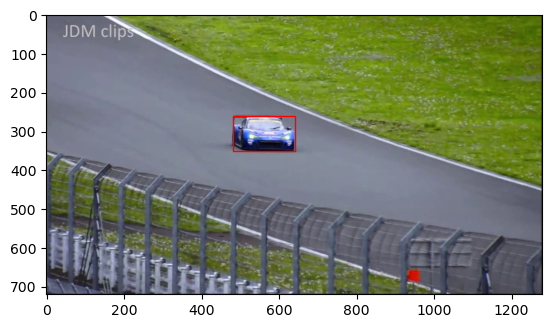

In [66]:
image = io.imread('images/racecar.png')

def drawROI(image, x, y, width, height, out = plt):
    plt.close()
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    #out.imshow(image)
    return image



imageROI = drawROI(image, 480, 260, 160, 90)

#480 + 260 width, 160 + 90

print(image.shape)

plt.imshow(imageROI)
plt.show()

### Task 4.1.1 - Mean Shift
* Implement the Mean Shift method for a ROI as described in the lecture. Test the algorithm on the image sequences "images/racecar/*.jpg" or "images/taco/*.jpg". Select the appropriate tracking window (to reduce the file size I have reduced the images by a factor of 2, i.e. the ROI from above must be adjusted accordingly). 
* Draw the trajectory of the objects as returned by Mean Shift. (**RESULT**)

In [176]:
image = io.imread("images/racecar/006.jpeg")
img = createProbDistribution(image,histgramCar256_hue_hist,histgramCar256_hue_bins,MIN_SATURATION_CAR,MIN_VALUE_CAR,MIN_PROB_CAR)

In [480]:
def plot_trajectory(centroids_history):
    x_coords = [centroid[0] for centroid in centroids_history]
    y_coords = [centroid[1] for centroid in centroids_history]
    print(centroids_history)
    plt.close()
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', color='r', linestyle='-', markersize=5, label='Trajectory')
    plt.show()

In [481]:
def compute_moments(img, i, j):
    moment = 0
    for x, row in enumerate(img):
        for y, pixel in enumerate(row):
            moment = moment + ( x**i*y**j * pixel )
    return moment

In [482]:
def compute_new_ROI(roi,center):
    centerX,centerY = center
    x,y,width,height = roi
    roi = (x , y ,width+ int(centerX - roi[2] / 2),height + int(centerY - roi[3] / 2))
    return roi

In [483]:
roi = (235, 125, 80, 45)
def meanShift(image,ROI):
    centroids_history = list()
    img_x, img_y, width, height = ROI
    
    iter_count = 0

    while True:
        window = image[img_y:img_y+height, img_x:img_x+width]
        m00 = compute_moments(window,0,0)
        m10 = compute_moments(window,1,0)
        m01 = compute_moments(window,0,1)
        new_centerX = m10/m00
        new_centerY = m01/m00
        new_roi = compute_new_ROI(ROI,(new_centerX,new_centerY))
        centroids_history.append( ( new_centerX+ROI[0], new_centerY+ROI[1]) )

        if( (np.abs(new_roi[0]-ROI[0])<2 and np.abs(new_roi[1]-ROI[1])<2) or  iter_count > 20):
            break
        plot_trajectory(centroids_history)
        plt.pause(0.1)  # Pause to allow the plot to update
        ROI = new_roi
        iter_count += 1
    plot_trajectory(centroids_history)
    print(new_centerX)
    return ROI, centroids_history

[(267.4218695925035, 172.11083660232447)]


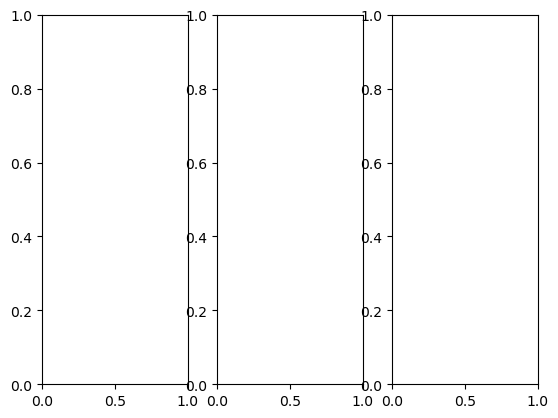

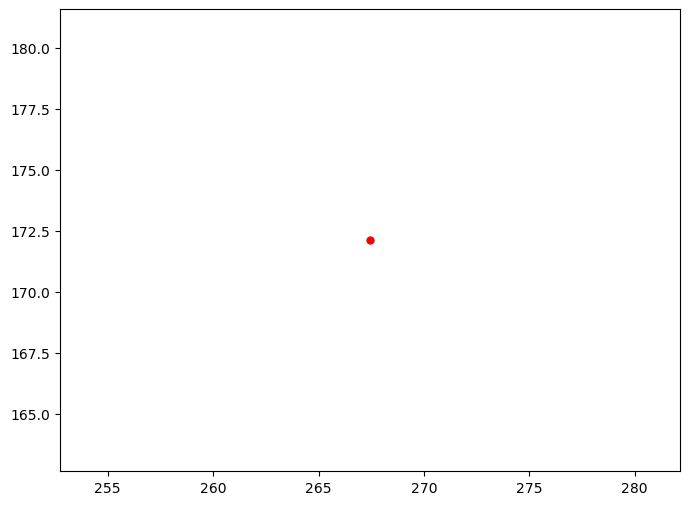

32.42186959250354


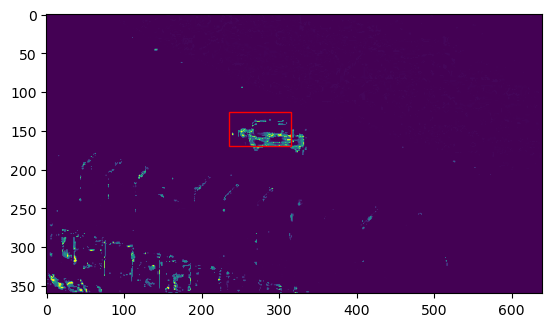

In [484]:
roi,centroids_history = meanShift(img,roi)
x,y,width,height = roi
window = drawROI(img,x,y,width,height)
#print(image[125:45, 235:80])
plt.imshow(window)
plt.show()

###  Task 4.1.2 - CAMSHIFT
* Extend your algorithm by adjusting the size of the ROI and finding the object's orientation
* Execute the algorithm again on one of the image sequences and draw an ellipse on the image, which represents the found parameters (**RESULT**)

In [519]:


def camshift(image, ROI):
    centroids_history = list()
    img_x, img_y, width, height = ROI
    
    iter_count = 0
   
    while True:
        window = image[img_y:img_y+height, img_x:img_x+width]
        m00 = compute_moments(window,0,0)
        m10 = compute_moments(window,1,0)
        m01 = compute_moments(window,0,1)


        

        new_centerX = m10/m00
        new_centerY = m01/m00
        new_roi = compute_new_ROI(ROI,(new_centerX,new_centerY))
        centroids_history.append( ( new_centerX+ROI[0], new_centerY+ROI[1]) )

        mu20 = compute_moments(image, 2, 0, new_centerX, new_centerY)
        mu02 = compute_moments(image, 0, 2, new_centerX, new_centerY)
        mu11 = compute_moments(image, 1, 1, new_centerX, new_centerY)

        theta = 0.5 * np.arctan2(2 * mu11, mu20 - mu02)

        theta_degrees = np.degrees(theta)
        if(m00==0):
            break
   
        if( (abs(new_roi[0]-ROI[0])<2 and abs(new_roi[1]-ROI[1])<2) or iter_count > 20):
            s = 2*np.sqrt(m00)
            ROI = (new_roi[0],new_roi[1],int(s * 1.5),int(s))
            break
        roi = new_roi
        iter_count += 1, 
    return ROI, centroids_history, theta_degrees

In [520]:
def drawROI_ellipse(image, x, y, width, height, theta_degrees,out = plt):
    plt.close()
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Ellipse(
            (x + width / 2, y + height / 2),
            width,
            height,
            angel = theta_degrees,
            fill=False,
            edgecolor="red"
        )
    )
    #out.imshow(image)
    return image

In [521]:

roi,centroids_history,theta_degrees = camshift(img,roi)
x,y,width,height = roi
window = drawROI_ellipse(img,x,y,width,height,theta_degrees)
#print(image[125:45, 235:80])
plt.imshow(window)
plt.show()

ValueError: cannot convert float NaN to integer

### Task 4.2: Histogram of Oriented Gradients (HOG)

* Gradients and directions: First, implement the extraction of the gradient via convolution with the Sobel kernels. Translate the two result matrices into an image containing the gradient direction (one angle per pixel). Display this image for each of the three input images above. Like it fancy? Add transparency inversely proportional to the gradient magnitude (weak gradients are transparent). 

In [ ]:
pers1 = io.imread('images/per00002.ppm')
pers2 = io.imread('images/per00007.ppm')
pers3 = io.imread('images/per00014.ppm')

fig = plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

#ax1.imshow(pers1)
#ax2.imshow(pers2)
#ax3.imshow(pers3)

In [ ]:
# code here

### Task 4.2.1 Gradient orientation histograms (GOHs)

Now implement a function that generates GOHs on image cells. Pass a gradient direction image (as described above) to the function. The image cells should be 8 x 8 pixels in size. Please do not forget the voting with "bi-linear interpolation" (important!). Compute the GOH for the input image "star.png" with and without interpolation! Now rotate the image by -5° and compute both variants of the GOH again! What are the Euclidean differences of the histograms (original vs rotated) with and without interpolation? (**RESULT**)

In [ ]:
# code here

### Task 4.2.2 Block and ROI normalization and creation of the HOG descriptor
* Given a fixed size ROI (128 x 64 pixels), create a descriptor as shown in the lecture (including normalization of the blocks and the total ROI). Please reuse the precalculated cell histograms for the blocks! 
* Calculate the descriptor for the three images above and for the unknown images "unknown1.png" and "unknown2.png". 
* Now compare the unknowns with the three person instances and calculate the Euclidean distance of the descriptors. Which picture has a smaller distance to the persons? (**RESULT**)

In [ ]:
# code here

## Congratz, you made it! :)